<a href="https://colab.research.google.com/github/sakshamkumar1/tensorflow-notebooks/blob/main/exercises_05_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-27 01:38:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-27 01:38:47 (96.3 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [49]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys,\
unzip_data, walk_through_dir

In [50]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-04-27 01:38:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   189MB/s    in 0.8s    

2023-04-27 01:38:48 (189 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [51]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [52]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

### 1. Using feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Using the ModelCheckpoint callback to save the weights to file.

In [53]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [54]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [55]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[checkpoint_callback])

Epoch 1/10
23/24 [===========================>..] - ETA: 0s - loss: 1.8166 - accuracy: 0.4742
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 17s 429ms/step - loss: 1.8081 - accuracy: 0.4827 - val_loss: 1.2440 - val_accuracy: 0.7552
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0456 - accuracy: 0.7677
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 352ms/step - loss: 1.0422 - accuracy: 0.7680 - val_loss: 0.8420 - val_accuracy: 0.8272
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7455 - accuracy: 0.8342
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 430ms/step - loss: 0.7480 - accuracy: 0.8360 - val_loss: 0.6796 - val_accuracy: 0.8472
Epoch 4/10
23/24 [===========================>..] - ETA: 0s - loss: 0.5973 - accuracy:

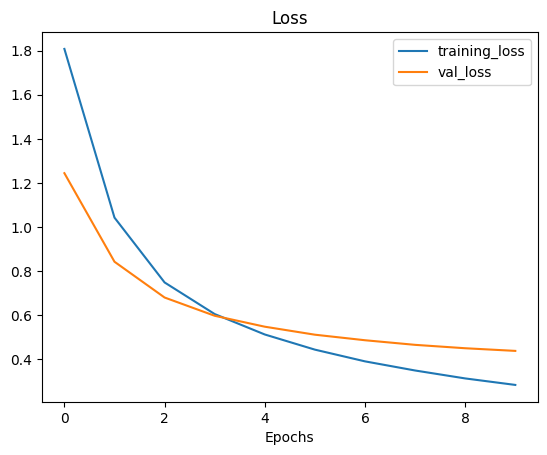

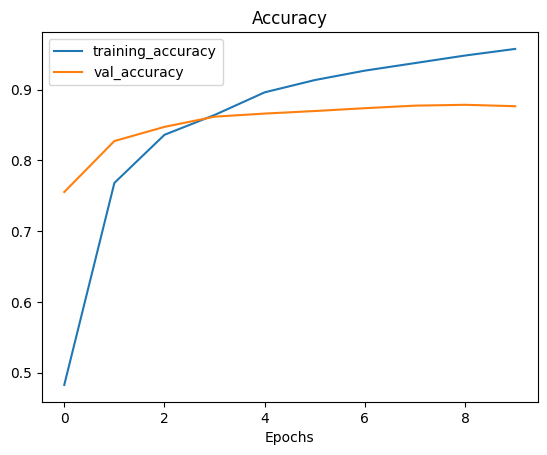

In [56]:
plot_loss_curves(history_0)

### 2. Fine-tuning the last 20 layers of the base model we trained for another 10 epochs.

In [57]:
model_0.layers

In [58]:
for layer in model_0.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fcc6c208760> True
<keras.engine.functional.Functional object at 0x7fccef697760> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fcc2070bb80> True
<keras.layers.core.dense.Dense object at 0x7fccef6d1d00> True


In [59]:
model_0.layers[1]

In [60]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [61]:
initial_epochs = 10

base_model.trainable = True


In [62]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_4 True
1 rescaling_6 True
2 normalization_3 True
3 rescaling_7 True
4 stem_conv_pad True
5 stem_conv True
6 stem_bn True
7 stem_activation True
8 block1a_dwconv True
9 block1a_bn True
10 block1a_activation True
11 block1a_se_squeeze True
12 block1a_se_reshape True
13 block1a_se_reduce True
14 block1a_se_expand True
15 block1a_se_excite True
16 block1a_project_conv True
17 block1a_project_bn True
18 block2a_expand_conv True
19 block2a_expand_bn True
20 block2a_expand_activation True
21 block2a_dwconv_pad True
22 block2a_dwconv True
23 block2a_bn True
24 block2a_activation True
25 block2a_se_squeeze True
26 block2a_se_reshape True
27 block2a_se_reduce True
28 block2a_se_expand True
29 block2a_se_excite True
30 block2a_project_conv True
31 block2a_project_bn True
32 block2b_expand_conv True
33 block2b_expand_bn True
34 block2b_expand_activation True
35 block2b_dwconv True
36 block2b_bn True
37 block2b_activation True
38 block2b_se_squeeze True
39 block2b_se_reshape True
40 block2b

In [63]:
for layer in base_model.layers[:-20]:
  layer.trainable=False

In [64]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [65]:
fine_tune_epochs = initial_epochs + 10

history_fine_tune_1 = model_0.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  initial_epoch=initial_epochs,
                                  callbacks=[checkpoint_callback])

Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 0.2278 - accuracy: 0.9511
Epoch 11: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 32s 642ms/step - loss: 0.2323 - accuracy: 0.9493 - val_loss: 0.3604 - val_accuracy: 0.8832
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9773
Epoch 12: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 463ms/step - loss: 0.1209 - accuracy: 0.9773 - val_loss: 0.3650 - val_accuracy: 0.8820
Epoch 13/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0728 - accuracy: 0.9878
Epoch 13: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 349ms/step - loss: 0.0733 - accuracy: 0.9880 - val_loss: 0.3593 - val_accuracy: 0.8808
Epoch 14/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0462 - ac

### 3. Fine-tuning the last 30 layers of the base model we trained for another 10 epochs.

In [67]:
for layer in base_model.layers[:-30]:
  layer.trainable = False

In [68]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [73]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                      optimizer=tf.keras.optimizers.Adam(),
                                      metrics=["accuracy"])

In [74]:
initial_epochs = fine_tune_epochs
fine_tune_epochs = initial_epochs + 10

history_fine_tune_2 = model_0.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  initial_epoch=initial_epochs,
                                  callbacks=[checkpoint_callback])

Epoch 41/50
23/24 [===========================>..] - ETA: 0s - loss: 0.3111 - accuracy: 0.9334
Epoch 41: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 433ms/step - loss: 0.3079 - accuracy: 0.9347 - val_loss: 0.4863 - val_accuracy: 0.8560
Epoch 42/50
23/24 [===========================>..] - ETA: 0s - loss: 0.0925 - accuracy: 0.9796
Epoch 42: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 312ms/step - loss: 0.0911 - accuracy: 0.9800 - val_loss: 0.4424 - val_accuracy: 0.8724
Epoch 43/50
23/24 [===========================>..] - ETA: 0s - loss: 0.0199 - accuracy: 0.9932
Epoch 43: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 338ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.5302 - val_accuracy: 0.8528
Epoch 44/50
23/24 [===========================>..] - ETA: 0s - loss: 0.0195 - acc

In [75]:
results_fine_tune_2 = model_0.evaluate(test_data)
print(results_fine_tune_2)

79/79 [==============================] - 7s 77ms/step - loss: 0.4494 - accuracy: 0.8916
[0.4493514597415924, 0.8916000127792358]
